In [4]:
from os.path import join as pjoin
from os import listdir, mkdir
from os.path import basename, isfile, isdir

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Figure 4 Panel A, B, D, E

In [28]:
WINDOW_LEFT = 0.5
WINDOW_RIGHT = 1.5
# 1/BIN_WIDTH must be an integer
BIN_WIDTH = 0.02

def raster(spikes, cue_times, leftP, session_name, brain_section):
    for ind in range(len(spikes)):
        fig, axes = plt.subplots(2, 1, figsize=(15, 10))
        pointer = 0
        # left side advantageous
        all_spikes_left = []
        # right side advantageous
        all_spikes_right = []

        for tiral_ind, cue in enumerate(cue_times):
            trial_spikes = []
            cue_left = cue - WINDOW_LEFT
            cue_right = cue + WINDOW_RIGHT

            cell = spikes[ind]
            # move the pointer into the trial window
            while pointer < len(cell) and cell[pointer] < cue_left:
                pointer += 1
            # recording all spikes in the window
            while pointer < len(cell) and cell[pointer] <= cue_right:
                relative_time = cell[pointer] - cue
                if leftP[tiral_ind] > 0.5:
                    all_spikes_left.append(relative_time)
                else:
                    all_spikes_right.append(relative_time)
                trial_spikes.append(relative_time)
                pointer += 1
            sns.scatterplot(x=trial_spikes, y=tiral_ind, ax=axes[0], color='black', markers='.', s=5)
        
        bins = np.arange(start=-WINDOW_LEFT, stop=WINDOW_RIGHT, step=BIN_WIDTH)
        left_y, left_bin_edges = np.histogram(all_spikes_left, bins=bins)
        left_bin_centers = 0.5 * (left_bin_edges[1:] + left_bin_edges[:-1])
        sns.lineplot(left_bin_centers, (left_y * int(1 / BIN_WIDTH)) / len(cue_times), ax=axes[1], label='Left P high')

        right_y, right_bin_edges = np.histogram(all_spikes_right, bins=bins)
        right_bin_centers = 0.5 * (right_bin_edges[1:] + right_bin_edges[:-1])
        sns.lineplot(right_bin_centers, right_y * int(1 / BIN_WIDTH) / len(cue_times), ax=axes[1], label='Right P high')

        axes[0].get_xaxis().set_visible(False)
        axes[1].set_xticks([-0.5, 0, 0.5, 1, 1.5])
        axes[0].spines['top'].set_visible(False)
        axes[0].spines['bottom'].set_visible(False)
        axes[0].spines['right'].set_visible(False)
        axes[1].spines['top'].set_visible(False)
        axes[1].spines['right'].set_visible(False)

        # set axis labels and fig name
        axes[0].set_ylabel('Trial Number')
        axes[1].set_ylabel('Frequency (HZ)')

        axes[1].legend(bbox_to_anchor=(1.15, 0.7))

        # save firing for a cell
        if not isdir(pjoin('figure_2', 'panel_A', session_name)):
            mkdir(pjoin('figure_2', 'panel_A', session_name))
            mkdir(pjoin('figure_2', 'panel_A', session_name, 'svg'))
            mkdir(pjoin('figure_2', 'panel_A', session_name, 'tiff'))
            
        plt.savefig(pjoin('figure_2', 'panel_A', session_name, 'tiff', brain_section + '_' + str(ind) + '.tiff'), dpi=200)
        plt.savefig(pjoin('figure_2', 'panel_A', session_name, 'svg', brain_section + '_' + str(ind) + '.svg'), format='svg')

c:\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureW

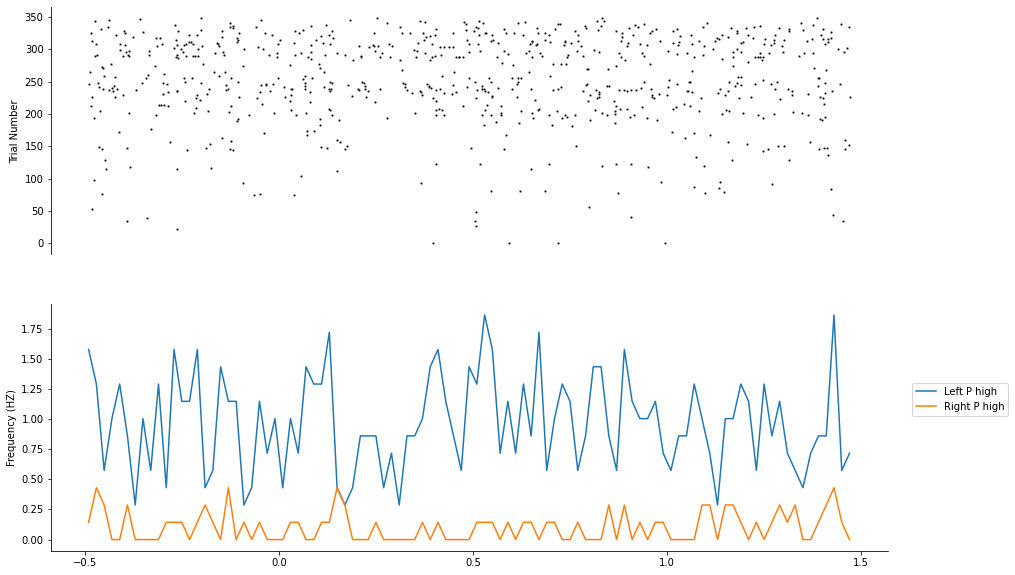

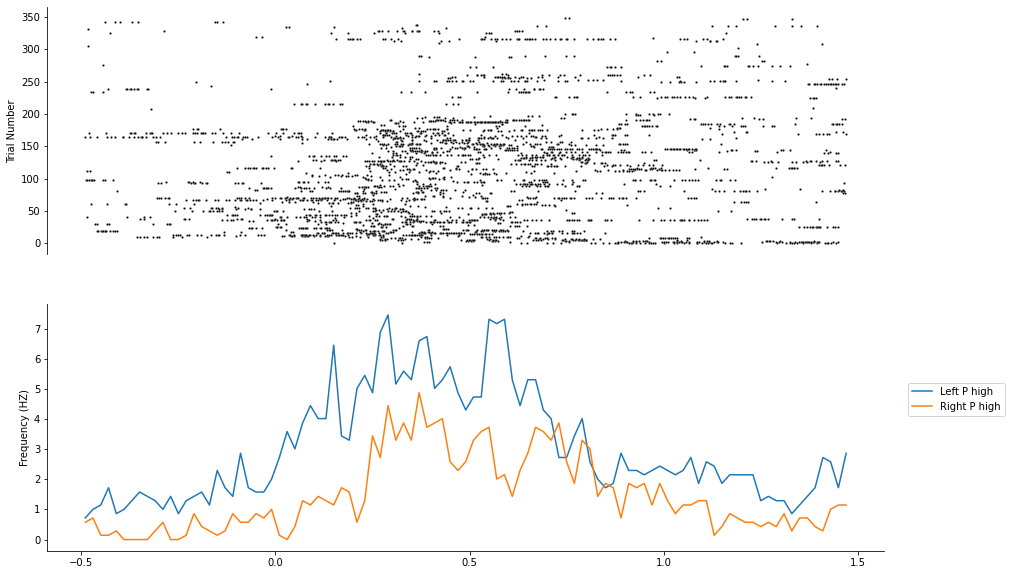

In [29]:
for dir in listdir(pjoin('data', 'spike_times')):
    pfc_path = pjoin('data', 'spike_times', dir, 'pfc.npy')
    str_path = pjoin('data', 'spike_times', dir, 'str.npy')

    if not isfile(pfc_path):
        print(dir)
        continue
    
    pfc_data = np.load(pfc_path, allow_pickle=True)
    str_data = np.load(str_path, allow_pickle=True)

    behaviour_path = pjoin('data', 'behaviour_data', 'csv', 'task_info', dir + '.csv')
    task_info = pd.read_csv(behaviour_path)

    cue_times = task_info['cue_time']
    leftP = task_info['leftP']

    raster(spikes=pfc_data, cue_times=cue_times, leftP=leftP, session_name=dir, brain_section='pfc')
    raster(spikes=str_data, cue_times=cue_times, leftP=leftP, session_name=dir, brain_section='str')
    break